In [6]:
#importing libaries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
#  Basic summary statistics
print("Summary statistics of features:")
print(df.describe())

# Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Summary statistics of features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000  

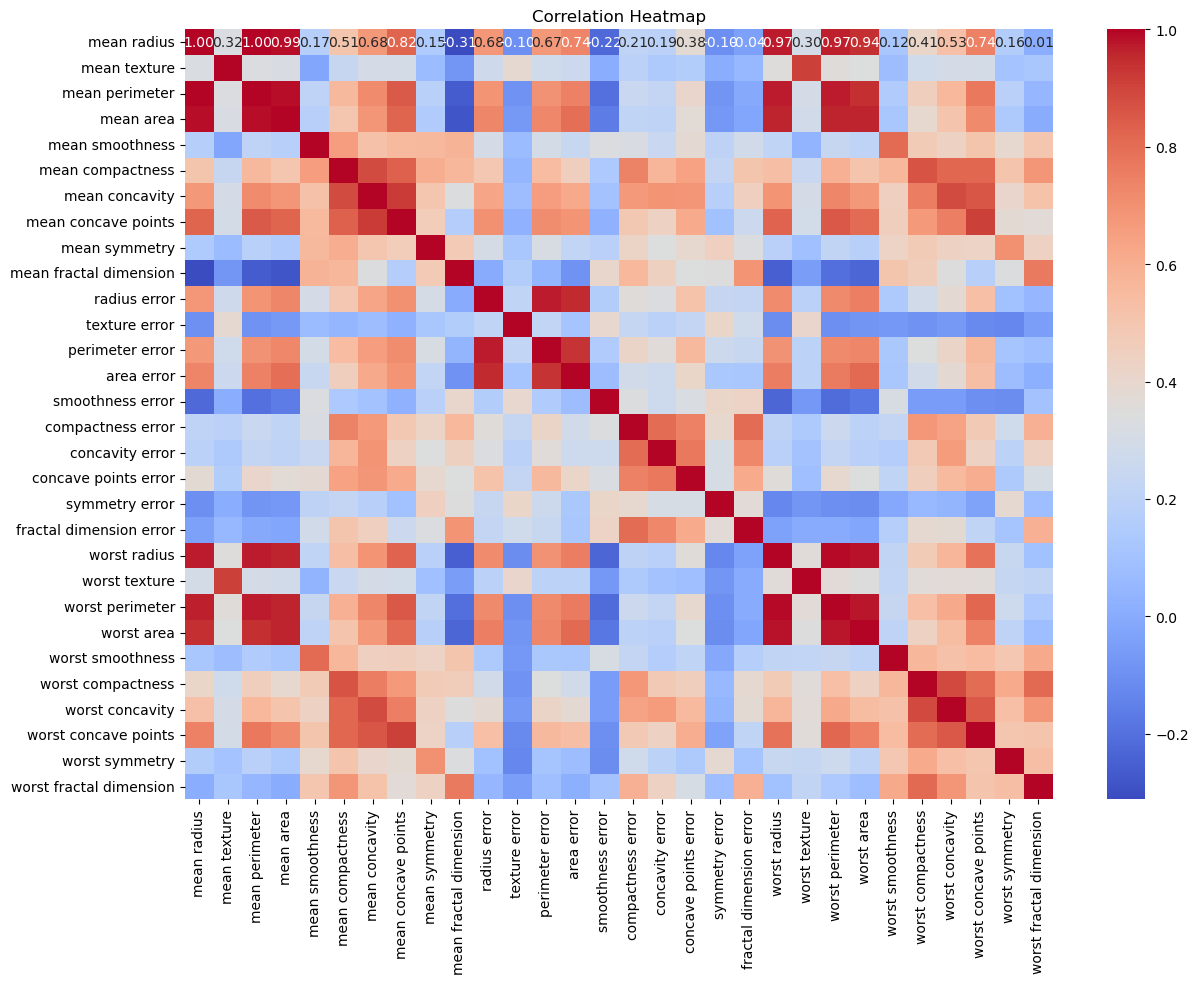

In [8]:
# Correlation heatmap to see relationships between features
plt.figure(figsize=(14, 10))
corr = df.drop('target', axis=1).corr()  # Exclude the target column
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

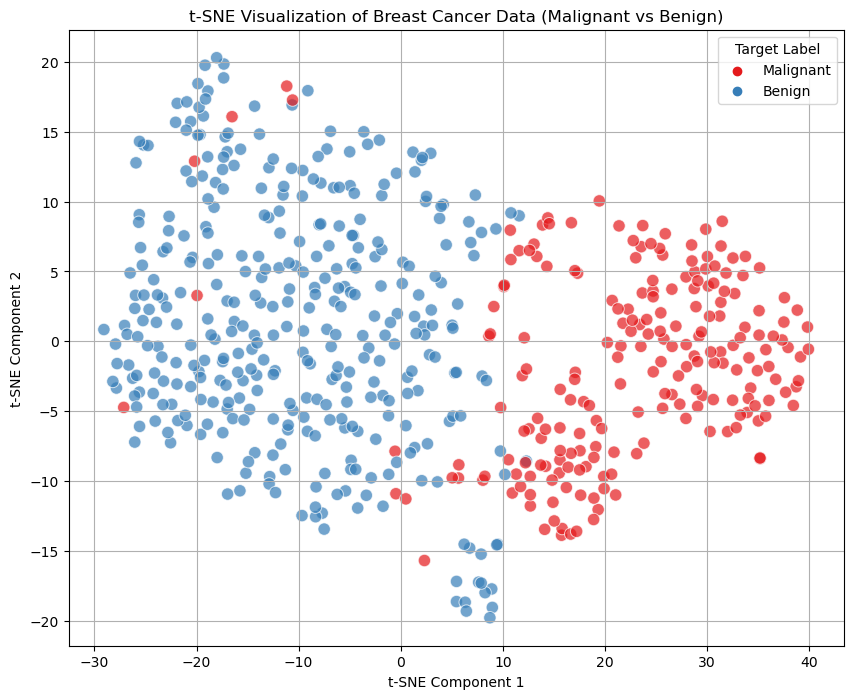

In [11]:
# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0 for malignant, 1 for benign)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Create a DataFrame for the t-SNE output and target labels
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['target'] = y

# Step 5: Define custom labels for target classes
tsne_df['target_label'] = tsne_df['target'].map({0: 'Malignant', 1: 'Benign'})

# Step 6: Visualize the t-SNE result with color mapping based on the target label
plt.figure(figsize=(10, 8))

# Use a custom color palette for distinct colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='target_label', data=tsne_df, palette='Set1', s=80, alpha=0.7)

plt.title('t-SNE Visualization of Breast Cancer Data (Malignant vs Benign)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add custom labels to the legend
plt.legend(title='Target Label', loc='best')
plt.grid(1)
plt.show()

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Inference error: nan

Decision Tree Results:
              precision   

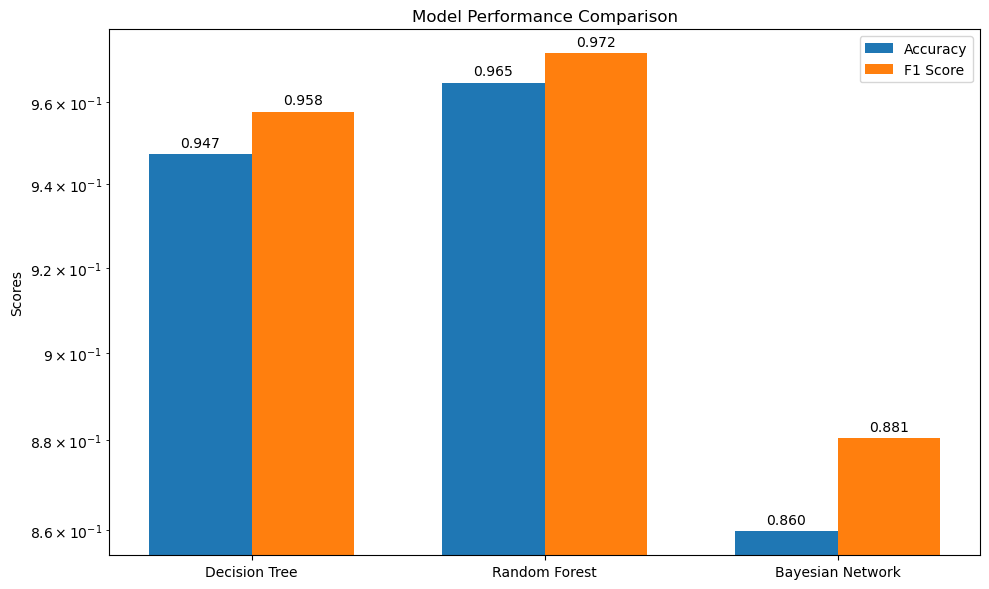

In [13]:
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

def preprocess_data(df):
    processed_df = df.copy()
    print("Missing values:\n", processed_df.isnull().sum())
    
    # Scale the features
    scaler = StandardScaler()
    features = processed_df.drop('target', axis=1)
    processed_df[features.columns] = scaler.fit_transform(features)
    
    return processed_df

def train_tree_models(X_train, X_test, y_train, y_test):
    results = {}
    
    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    
    results['decision_tree'] = {
        'model': dt,
        'predictions': dt_pred,
        'accuracy': accuracy_score(y_test, dt_pred),
        'f1': f1_score(y_test, dt_pred),
        'classification_report': classification_report(y_test, dt_pred)
    }
    
    # Random Forest
    rf = RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    
    results['random_forest'] = {
        'model': rf,
        'predictions': rf_pred,
        'accuracy': accuracy_score(y_test, rf_pred),
        'f1': f1_score(y_test, rf_pred),
        'classification_report': classification_report(y_test, rf_pred)
    }
    
    return results

def train_bayesian_network(X_train, X_test, y_train, y_test):
    # Discretize continuous variables
    X_discrete_train = pd.DataFrame()
    X_discrete_test = pd.DataFrame()
    
    # Select key features for the Bayesian Network
    key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
    
    # Discretize training data
    for column in key_features:
        bins = pd.qcut(X_train[column], q=4, labels=['low', 'medium-low', 'medium-high', 'high'])
        X_discrete_train[column] = bins
        # Use the same bins from training data for test data
        _, bins_edges = pd.qcut(X_train[column], q=4, retbins=True, labels=False)
        X_discrete_test[column] = pd.cut(X_test[column], bins=bins_edges, labels=['low', 'medium-low', 'medium-high', 'high'])
    
    # Create network structure
    model = BayesianNetwork([
        ('mean radius', 'target'),
        ('mean texture', 'target'),
        ('mean perimeter', 'target'),
        ('mean area', 'target')
    ])
    
    # Prepare data for training
    data_bn_train = X_discrete_train.copy()
    data_bn_train['target'] = y_train
    
    # Estimate parameters
    mle = MaximumLikelihoodEstimator(model=model, data=data_bn_train)
    
    # Add CPDs for feature nodes
    for feature in key_features:
        cpd = mle.estimate_cpd(feature)
        model.add_cpds(cpd)
    
    # Calculate CPD for target node
    target_cpd = mle.estimate_cpd('target')
    model.add_cpds(target_cpd)
    
    # Check model validity
    if not model.check_model():
        raise ValueError("Invalid Bayesian Network - Check CPDs and structure")
    
    # Make predictions
    inference = VariableElimination(model)
    predictions = []
    
    for _, row in X_discrete_test.iterrows():
        evidence = {col: row[col] for col in key_features}
        try:
            pred_prob = inference.query(variables=['target'], evidence=evidence)
            pred = 1 if pred_prob.values[1] > 0.5 else 0
        except Exception as e:
            print(f"Inference error: {e}")
            pred = 1  # Default prediction in case of error
        predictions.append(pred)
    
    return {
        'model': model,
        'predictions': predictions,
        'accuracy': accuracy_score(y_test, predictions),
        'f1': f1_score(y_test, predictions),
        'classification_report': classification_report(y_test, predictions)
    }

def plot_model_comparison(tree_results, bn_results):
    models = ['Decision Tree', 'Random Forest', 'Bayesian Network']
    accuracies = [
        tree_results['decision_tree']['accuracy'],
        tree_results['random_forest']['accuracy'],
        bn_results['accuracy']
    ]
    f1_scores = [
        tree_results['decision_tree']['f1'],
        tree_results['random_forest']['f1'],
        bn_results['f1']
    ]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
    rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')
    
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    plt.yscale('log')
    ax.legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    plt.tight_layout()
    return plt

def main():
    # Preprocess data
    processed_df = preprocess_data(df)
    
    # Split data
    X = processed_df.drop('target', axis=1)
    y = processed_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train models and get results
    tree_results = train_tree_models(X_train, X_test, y_train, y_test)
    bn_results = train_bayesian_network(X_train, X_test, y_train, y_test)
    
    # Print detailed results
    print("\nDecision Tree Results:")
    print(tree_results['decision_tree']['classification_report'])
    print("\nRandom Forest Results:")
    print(tree_results['random_forest']['classification_report'])
    print("\nBayesian Network Results:")
    print(bn_results['classification_report'])
    
    # Plot comparison
    plot_model_comparison(tree_results, bn_results)
    plt.show()
    
    return tree_results, bn_results

if __name__ == "__main__":
    tree_results, bn_results = main()